In [18]:
!echo $CUDA_VISIBLE_DEVICES

0,1,2,3


In [2]:
import torch

In [3]:
DEVICE = torch.device('cpu')
DEVICE

device(type='cpu')

In [19]:
from tqdm.notebook import tqdm

In [5]:
%run datasets/iu_xray.py
%run training/report_generation/hierarchical.py
%run utils/nlp.py

In [6]:
train_dataset = IUXRayDataset('train')
len(train_dataset)

5923

### Compute stats

In [22]:
from collections import Counter

In [25]:
def get_dataset_stats(dataset):
    word_appearances = dict()

    words_count = []
    sentences_count = []

    for image, report in tqdm(dataset):
        # Save appearances
        for word in report:
            if word not in word_appearances:
                word_appearances[word] = 0
            word_appearances[word] += 1

        # Must end with a dot
        if report[-1] != END_OF_SENTENCE_IDX:
            report.append(END_OF_SENTENCE_IDX)

        # Count words
        n_words = len(report)
        words_count.append(n_words)

        # Count sentences
        n_sentences = report.count(END_OF_SENTENCE_IDX)
        sentences_count.append(n_sentences)

    return word_appearances, words_count, sentences_count

In [26]:
word_appearances, words_count, sentences_count = get_dataset_stats(train_dataset)

{17: 7788,
 378: 77,
 37: 1089,
 4: 27050,
 337: 143,
 362: 32,
 176: 284,
 50: 2718,
 32: 3373,
 52: 3724,
 10: 3398,
 13: 5931,
 27: 564,
 23: 4093,
 46: 1220,
 44: 586,
 14: 2485,
 8: 4642,
 11: 6869,
 299: 55,
 135: 497,
 136: 208,
 5: 10078,
 201: 539,
 16: 6950,
 26: 3651,
 53: 158,
 71: 231,
 127: 526,
 973: 1,
 922: 19,
 19: 476,
 39: 3924,
 555: 9,
 974: 1,
 523: 12,
 524: 48,
 1290: 2,
 30: 593,
 62: 2341,
 878: 5,
 181: 770,
 285: 209,
 283: 79,
 930: 52,
 217: 249,
 661: 35,
 265: 277,
 29: 1260,
 123: 834,
 28: 3850,
 22: 4174,
 219: 127,
 349: 66,
 359: 59,
 395: 61,
 51: 216,
 9: 934,
 49: 241,
 35: 697,
 25: 4005,
 55: 491,
 76: 27,
 77: 35,
 63: 1450,
 78: 7,
 45: 1164,
 165: 404,
 166: 343,
 20: 2767,
 225: 197,
 206: 7,
 43: 1673,
 449: 37,
 158: 171,
 164: 944,
 113: 213,
 718: 20,
 112: 475,
 226: 161,
 131: 354,
 107: 317,
 450: 117,
 139: 871,
 109: 942,
 730: 19,
 568: 39,
 533: 42,
 341: 119,
 258: 174,
 363: 117,
 260: 77,
 284: 388,
 41: 706,
 228: 270,
 292:

In [67]:
import matplotlib.pyplot as plt
import numpy as np

In [65]:
def plot_counter(counter, title):
    x = list(counter.keys())
    y = list(counter.values())
    
    plt.bar(x, y)
    plt.title(title)

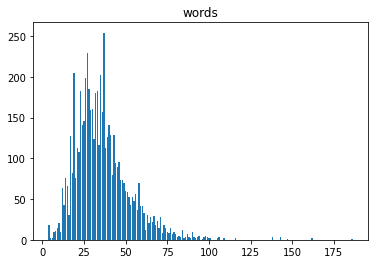

In [66]:
plot_counter(Counter(words_count), 'words')

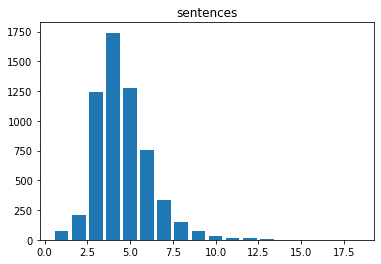

In [70]:
plot_counter(Counter(sentences_count), 'sentences')

In [77]:
counter = Counter(sentences_count)

In [94]:
def get_percentiles(counter):
    items = sorted(counter.items())

    keys, values = zip(*items)

    return list(zip(keys, np.cumsum(values) / total * 100))

In [95]:
get_percentiles(Counter(words_count))

[(4, 0.30390005065000847),
 (5, 0.3376667229444538),
 (6, 0.37143339523889923),
 (7, 0.5402667567111261),
 (8, 0.7259834543305757),
 (9, 0.9792334965389161),
 (10, 1.3169002194833699),
 (11, 1.485733580955597),
 (12, 2.566267094377849),
 (13, 3.2922505487084246),
 (14, 4.575384095897349),
 (15, 5.689684281614047),
 (16, 6.196184366030728),
 (17, 8.340368056728009),
 (18, 9.724801620800271),
 (19, 13.169002194833698),
 (20, 14.452135742022623),
 (21, 16.35995272665879),
 (22, 18.183353030558838),
 (23, 21.27300354550059),
 (24, 23.65355394225899),
 (25, 26.118521019753505),
 (26, 29.461421576903597),
 (27, 33.327705554617594),
 (28, 36.451122741853794),
 (29, 39.135573189262196),
 (30, 41.83690697281783),
 (31, 43.93044065507345),
 (32, 46.96944116157353),
 (33, 50.05909167651528),
 (34, 52.017558669593114),
 (35, 55.4279925713321),
 (36, 58.07867634644606),
 (37, 62.367043727840624),
 (38, 64.25797737632956),
 (39, 66.38527773087962),
 (40, 68.76582812763802),
 (41, 70.94377849062975),

In [96]:
get_percentiles(Counter(sentences_count))

[(1, 1.2324835387472564),
 (2, 4.761100793516799),
 (3, 25.730204288367382),
 (4, 55.10720918453487),
 (5, 76.66722944453824),
 (6, 89.39726489954415),
 (7, 95.03629917271653),
 (8, 97.6194496032416),
 (9, 98.86881647813608),
 (10, 99.42596657099443),
 (11, 99.71298328549722),
 (12, 99.89869998311667),
 (13, 99.96623332770555),
 (17, 99.98311666385278),
 (18, 100.0)]

### Evaluate in subsets

In [7]:
%run -n train_report_generation.py
%run datasets/__init__.py
%run models/checkpoint/__init__.py
%run training/report_generation/flat.py
%run training/report_generation/hierarchical.py
%run models/report_generation/__init__.py

In [22]:
def eval_in_subset(run_name, compiled_model, debug=True, max_n_words=None, max_n_sentences=None,
                   device='cuda'):
    # Create datasets
    vocab = compiled_model['vocab']
    train_dataset = IUXRayDataset('train', vocab=vocab)
    val_dataset = IUXRayDataset('val', vocab=vocab)
    test_dataset = IUXRayDataset('test', vocab=vocab)
    
    # Prepare subsets
    subset_kwargs = {
        'max_n_words': max_n_words,
        'max_n_sentences': max_n_sentences,
    }
    
    train_subset = create_report_dataset_subset(train_dataset, **subset_kwargs)
    val_subset = create_report_dataset_subset(val_dataset, **subset_kwargs)
    test_subset = create_report_dataset_subset(test_dataset, **subset_kwargs)
    
    # Decide hierachical
    decoder_name = compiled_model.metadata['decoder_kwargs']['decoder_name']
    hierarchical = is_decoder_hierarchical(decoder_name)
    if hierarchical:
        create_dataloader = create_hierarchical_dataloader
    else:
        create_dataloader = create_flat_dataloader

    # Create dataloaders
    BS = 10
    train_dataloader = create_dataloader(train_subset, batch_size=BS)
    val_dataloader = create_dataloader(val_subset, batch_size=BS)
    test_dataloader = create_dataloader(test_subset, batch_size=BS)
    
    # Create a suffix
    if max_n_words:
        suffix = f'max-words-{max_n_words}'
    elif max_n_sentences:
        suffix = f'max-sentences-{max_n_sentences}'
        
    evaluate_and_save(run_name,
                      compiled_model.model,
                      train_dataloader,
                      val_dataloader,
                      test_dataloader,
                      hierarchical=hierarchical,
                      debug=debug,
                      device=device,
                      suffix=suffix,
                     )

In [16]:
run_name = '0714_181427_lstm_lr0.0001_densenet-121'
debug = True

In [13]:
compiled_model = load_compiled_model_report_generation(run_name,
                                                       debug=debug,
                                                       device=DEVICE)

In [25]:
eval_n_words = [
    20 , # --> 15%
    25 , # --> 26%
    27 , # --> 33%
    33 , # --> 50%
    39 , # --> 66%
    41 , # --> 70%
    44 , # --> 75%
    47 , # --> 80%
    58 , # --> 90%
    # None, # --> 100%
]

In [23]:
for n_words in tqdm(eval_n_words):
    eval_in_subset(run_name,
                   compiled_model,
                   max_n_words=n_words,
                   max_n_sentences=None,
                   debug=debug,
                   device=DEVICE,
                  )

Current run is terminating due to exception: Target 973 is out of bounds..
Engine run is terminating due to exception: Target 973 is out of bounds..


IndexError: Target 973 is out of bounds.

In [26]:
eval_n_sentences = [
#     1, # 1.2324835387472564
#     2, # 4.761100793516799
    3, # 25.730204288367382
    4, # 55.10720918453487
    5, # 76.66722944453824
    6, # 89.39726489954415
#     7, # 95.03629917271653
#     8, # 97.6194496032416
#     9, # 98.86881647813608
#     10, # 99.42596657099443
#     11, # 99.71298328549722
#     12, # 99.89869998311667
#     13, # 99.96623332770555
#     17, # 99.98311666385278
#     18, # 100
]

SyntaxError: invalid syntax (<ipython-input-26-73ab00ab1d48>, line 1)